# Loading the Data and Binning

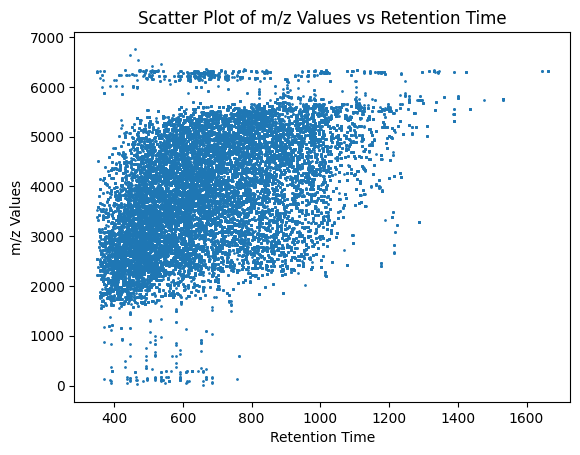

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the dataset forom /mzXML folder:
dt = np.loadtxt(os.path.join("mzXML", "EC10.csv"))
# extract the MZ and RT datapoints:
mz = dt[:, 0]
rt = dt[:, 1]
# Display scatter plot

plt.scatter(rt, mz, s=1)

plt.xlabel('Retention Time')
plt.ylabel('m/z Values')
plt.title('Scatter Plot of m/z Values vs Retention Time')
plt.show()

In [2]:
def binning_func(dt_arr, num_bins_mz, num_bins_rt):
    # Calculate the minimum and maximum values for mz and rt
    min_mz = np.min(dt_arr[:, 0])
    max_mz = np.max(dt_arr[:, 0])  # mz
    min_rt = np.min(dt_arr[:, 1])
    max_rt = np.max(dt_arr[:, 1])  # rt

    # Calculate the bin width for mz and rt
    bin_width_mz = (max_mz - min_mz) / num_bins_mz
    bin_width_rt = (max_rt - min_rt) / num_bins_rt

    # Initialize the binned matrix with zeros
    binned_mat = np.zeros((num_bins_mz, num_bins_rt))

    # Generate column names for the binned matrix based on rt
    col_names = []
    for i in range(num_bins_rt):
        tmp = "mz_" + str(int(i * bin_width_rt + min_rt))
        col_names.append(tmp)

    # Generate row names for the binned matrix based on mz
    row_names = []
    for i in range(num_bins_mz):
        tmp = "rt_" + str(int(i * bin_width_mz + min_mz))
        row_names.append(tmp)

    # Iterate over each data point and assign it to the corresponding bin
    for i in range(dt_arr.shape[0]):
        bin_mz = int((dt_arr[i, 0] - min_mz) // bin_width_mz)
        bin_rt = int((dt_arr[i, 1] - min_rt) // bin_width_rt)

        # Handle cases where the data point is outside the binning range
        if bin_mz < 0:
            bin_mz = 0
        elif bin_mz >= num_bins_mz:
            bin_mz = num_bins_mz - 1

        if bin_rt < 0:
            bin_rt = 0
        elif bin_rt >= num_bins_rt:
            bin_rt = num_bins_rt - 1

        # Increment the count for the corresponding bin
        binned_mat[bin_mz, bin_rt] += 1

    # Create a DataFrame with the binned matrix and assign column and row names
    df_binned = pd.DataFrame(binned_mat, columns=col_names)
    df_binned.index = row_names

    return df_binned


In [3]:
# Initialize an empty list to store the binned and flattened data
binned_flattened_data_list = []
file_names = []

In [4]:
# Get a list of all CSV files in the "mzXML" folder
csv_files = [file for file in os.listdir("mzXML") if file.endswith(".csv")]
raw_sample_matrix = []

In [5]:
# Loop through each CSV file and process its data
for csv_file in csv_files:
    dataset = np.loadtxt(os.path.join("mzXML", csv_file))
    num_bins_mz = 25
    num_bins_rt = 25
    df_bin = binning_func(dataset, num_bins_mz, num_bins_rt)
    raw_sample_matrix.append(df_bin)
    flatten_matrix = df_bin.to_numpy().flatten()
    binned_flattened_data_list.append(flatten_matrix)
    file_names.append(csv_file)


In [6]:
# Create a list of column names for the flattened matrix
flatten_matrix_name = []
for mz in raw_sample_matrix[0].columns:
    for rt in raw_sample_matrix[0].index:
        tmp = mz + "_" + rt
        flatten_matrix_name.append(tmp)

In [7]:
# Convert the list of flattened data arrays into a DataFrame
df = pd.DataFrame(binned_flattened_data_list, columns=flatten_matrix_name)
df.index = file_names
df

,mz_350_rt_17,mz_350_rt_286,mz_350_rt_556,mz_350_rt_826,mz_350_rt_1095,mz_350_rt_1365,mz_350_rt_1635,mz_350_rt_1905,mz_350_rt_2174,mz_350_rt_2444,...,mz_1572_rt_4062,mz_1572_rt_4332,mz_1572_rt_4601,mz_1572_rt_4871,mz_1572_rt_5141,mz_1572_rt_5410,mz_1572_rt_5680,mz_1572_rt_5950,mz_1572_rt_6219,mz_1572_rt_6489
EC08.csv,4.0,19.0,25.0,30.0,19.0,32.0,24.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC44.csv,0.0,0.0,6.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC07.csv,11.0,19.0,22.0,30.0,39.0,47.0,8.0,4.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC38.csv,21.0,12.0,13.0,14.0,18.0,13.0,10.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVA_LCMS_CID_z1.csv,5.0,0.0,11.0,0.0,3.0,1.0,0.0,7.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC22.csv,12.0,13.0,19.0,33.0,20.0,6.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC03.csv,5.0,11.0,22.0,23.0,23.0,16.0,14.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC46.csv,0.0,1.0,7.0,12.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC23.csv,8.0,12.0,12.0,16.0,21.0,12.0,12.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dataset[1,0]

3642.236407542806

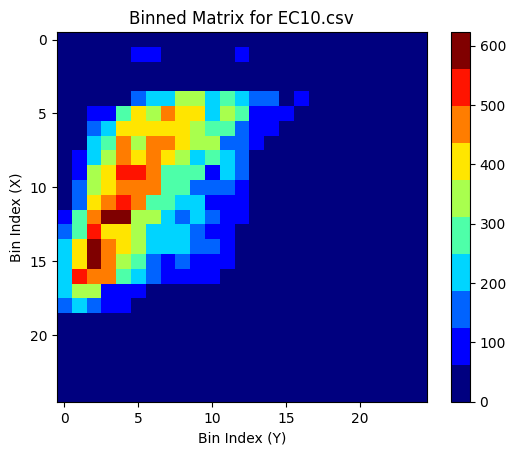

In [9]:
import matplotlib.pyplot as plt

# Specify the file name for which to plot the binned matrix
filename = "EC10.csv"

# Retrieve the binned matrix for the specified file
binned_matrix = df.loc[filename].values.reshape(num_bins_mz, num_bins_rt)

# Create a color map
cmap = plt.cm.get_cmap('jet', 10)  # Specify the colormap and the number of colors

# Plot the binned matrix as an image with mirroring
plt.imshow(np.flipud(binned_matrix), cmap=cmap)  # Use np.flipud() to flip the matrix vertically

# Add color bar
plt.colorbar()

# Add title and axis labels
plt.title("Binned Matrix for {}".format(filename))
plt.xlabel("Bin Index (Y)")
plt.ylabel("Bin Index (X)")

# Display the plot
plt.show()


In [13]:
df.index = df.index.str.replace('.csv', '')

/tmp/ipykernel_3102236/2751316354.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace('.csv', '')


In [14]:
#Group 1: Samples without CA and OVA (CA = 0, OVA = 0)
#Group 2: Samples with CA and/or OVA (CA = H or L, OVA = H or L)
import pandas as pd

# Create a dictionary to map sample names to groups
group_mapping = {
    "EC01": "Group 1",
    "EC02": "Group 1",
    "EC05": "Group 1",
    "EC11": "Group 1",
    "EC13": "Group 1",
    "EC26": "Group 1",
    "EC31": "Group 1",
    "EC38": "Group 1",
    "EC46": "Group 1",
    "EC48": "Group 1",
    "EC04": "Group 2",
    "EC09": "Group 2",
    "EC10": "Group 2",
    "EC16": "Group 2",
    "EC20": "Group 2",
    "EC22": "Group 2",
    "EC23": "Group 2",
    "EC25": "Group 2",
    "EC28": "Group 2",
    "EC30": "Group 2",
    "EC32": "Group 2",
    "EC33": "Group 2",
    "EC34": "Group 2",
    "EC37": "Group 2",
    "EC39": "Group 2",
    "EC43": "Group 2",
    "EC44": "Group 2",
    "EC45": "Group 2",
    "EC47": "Group 2",
    "EC49": "Group 2"
}

# Assign the corresponding group to the samples using the mapping dictionary
df["Group"] = df.index.map(group_mapping.get)

# Print the updated DataFrame
df

,mz_350_rt_17,mz_350_rt_286,mz_350_rt_556,mz_350_rt_826,mz_350_rt_1095,mz_350_rt_1365,mz_350_rt_1635,mz_350_rt_1905,mz_350_rt_2174,mz_350_rt_2444,...,mz_1572_rt_4332,mz_1572_rt_4601,mz_1572_rt_4871,mz_1572_rt_5141,mz_1572_rt_5410,mz_1572_rt_5680,mz_1572_rt_5950,mz_1572_rt_6219,mz_1572_rt_6489,Group
EC08,4.0,19.0,25.0,30.0,19.0,32.0,24.0,3.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
EC44,0.0,0.0,6.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 2
EC07,11.0,19.0,22.0,30.0,39.0,47.0,8.0,4.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
EC38,21.0,12.0,13.0,14.0,18.0,13.0,10.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 1
OVA_LCMS_CID_z1,5.0,0.0,11.0,0.0,3.0,1.0,0.0,7.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC22,12.0,13.0,19.0,33.0,20.0,6.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 2
EC03,5.0,11.0,22.0,23.0,23.0,16.0,14.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
EC46,0.0,1.0,7.0,12.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 1
EC23,8.0,12.0,12.0,16.0,21.0,12.0,12.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 2


In [16]:
# Filter the DataFrame to keep only samples with "EC" in their names
df = df[df.index.to_series().str.contains("EC")]

In [17]:
df['Group'].unique()

array([None, 'Group 2', 'Group 1'], dtype=object)

In [18]:
# Remove rows with None values in the "Group" column
df = df.dropna(subset=['Group'])

In [19]:
# Rename "Group 1" to 0 and "Group 2" to 1
df['Group'] = df['Group'].replace({'Group 1': 0, 'Group 2': 1})


In [20]:
df

,mz_350_rt_17,mz_350_rt_286,mz_350_rt_556,mz_350_rt_826,mz_350_rt_1095,mz_350_rt_1365,mz_350_rt_1635,mz_350_rt_1905,mz_350_rt_2174,mz_350_rt_2444,...,mz_1572_rt_4332,mz_1572_rt_4601,mz_1572_rt_4871,mz_1572_rt_5141,mz_1572_rt_5410,mz_1572_rt_5680,mz_1572_rt_5950,mz_1572_rt_6219,mz_1572_rt_6489,Group
EC44,0.0,0.0,6.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
EC38,21.0,12.0,13.0,14.0,18.0,13.0,10.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
EC20,7.0,8.0,6.0,12.0,7.0,16.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
EC33,2.0,9.0,8.0,9.0,18.0,4.0,6.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
EC30,0.0,4.0,4.0,9.0,0.0,8.0,1.0,7.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
EC34,1.0,4.0,13.0,14.0,19.0,12.0,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
EC37,6.0,3.0,4.0,17.0,18.0,15.0,17.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
EC13,17.0,21.0,25.0,21.0,24.0,22.0,25.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
EC31,4.0,9.0,11.0,13.0,1.0,8.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
EC25,8.0,18.0,16.0,22.0,16.0,22.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#  Data Augmentation

In [14]:
synthetic_samples = {
    0: 60,  # Number of synthetic samples for class 1
    1: 60,  # Number of synthetic samples for class 2
    # Add more classes and desired synthetic sample counts as needed
}

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=synthetic_samples)

In [16]:
# Split the data into features (X) and target variable (y)
X = df.drop('Group', axis=1)
y = df['Group']

X, y = smote.fit_resample(X, y)


/home/anepal/.conda/envs/MLenv/lib/python3.9/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (60) in class 0 will be larger than the number of samples in the majority class (class #1 -> 20)
  warnings.warn(
/home/anepal/.conda/envs/MLenv/lib/python3.9/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (60) in class 1 will be larger than the number of samples in the majority class (class #1 -> 20)
  warnings.warn(


In [17]:
y.value_counts()

1    60
0    60
Name: Group, dtype: int64

# GradientBoostingClassifier

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(model, param_grid, refit=True, verbose=3)

# Fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.933 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.933 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.786 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.857 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.857 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, subsample=1.0;, score=0.933 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_de

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10], 'n_estimators': [100],
                         'subsample': [0.8, 1.0]},
             verbose=3)

In [21]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
GradientBoostingClassifier(max_features='sqrt', min_samples_split=5,
                           random_state=42, subsample=0.8)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.91      0.95        23

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [23]:
model_xgb = grid.best_estimator_
model_xgb.fit(X_train,y_train)

GradientBoostingClassifier(max_features='sqrt', min_samples_split=5,
                           random_state=42, subsample=0.8)

In [24]:
y_proba = model_xgb.fit(X_train, y_train).predict_proba(X_test)

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import auc
def roc(X_train,y_train,model,label):
    cv = StratifiedKFold(n_splits=6)
    classifier = model
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X_train, y_train)):
        classifier.fit(X_train.iloc[train], y_train.iloc[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_train.iloc[test],
            y_train.iloc[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=label,
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()

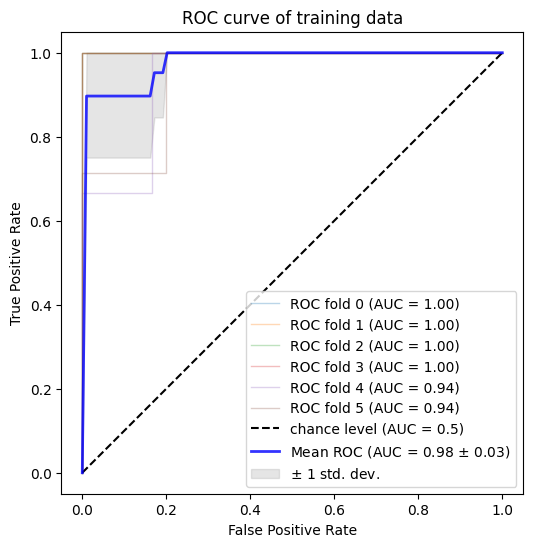

In [26]:
from sklearn.metrics import RocCurveDisplay
model = model_xgb
label="ROC curve of training data"
roc(X_train,y_train,model,label)

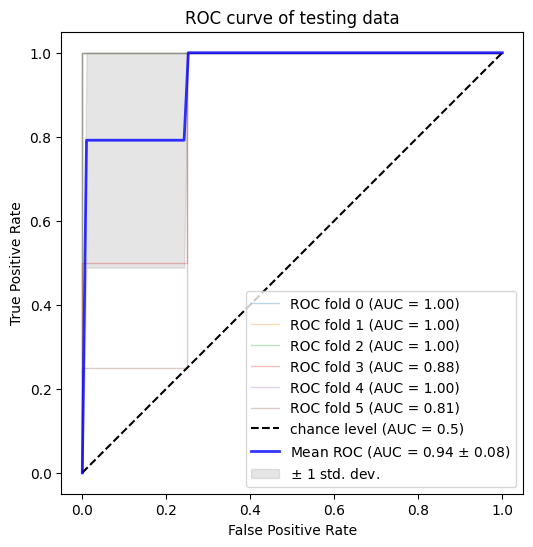

In [27]:
label="ROC curve of testing data"
roc(X_test,y_test,model,label)

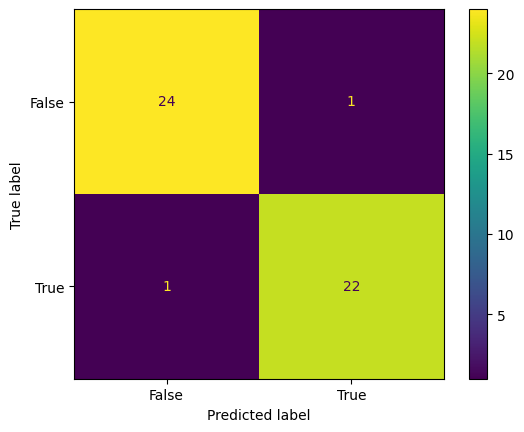

In [28]:
#######CONFUSION MATRIX ###########
from sklearn import metrics
y_test_pred_xgb= model_xgb.predict(X_test)
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()

In [29]:
total1=sum(sum(confusion_matrix_test))
#####from confusion matrix calculate accuracy
accuracy1=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9583333333333334
Sensitivity :  0.96
Specificity :  0.9565217391304348


In [30]:
# for important features:
important_feat = model_xgb.feature_importances_
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:30]

In [31]:
df1 = X.T

In [32]:
top_met = df1.iloc[idx]

In [33]:
top_met

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
mz_668_rt_822,3.0,2.0,49.0,10.0,27.0,11.0,2.0,149.0,70.0,2.0,...,5.678043,3.937124,23.400068,68.930301,60.513771,3.319237,28.163915,1.151430,57.493303,51.394508
mz_721_rt_280,44.0,48.0,271.0,3.0,112.0,6.0,53.0,480.0,136.0,62.0,...,21.866274,115.365479,96.782104,209.231350,306.363726,6.000000,254.778655,61.163995,490.152660,325.834230
mz_668_rt_1636,6.0,0.0,15.0,9.0,15.0,4.0,1.0,66.0,34.0,4.0,...,0.462302,10.577154,12.545501,28.686354,4.308641,1.905246,4.090165,10.697140,33.112125,19.549565
mz_827_rt_2449,81.0,70.0,130.0,28.0,18.0,27.0,90.0,136.0,27.0,85.0,...,31.568518,83.697144,20.290866,125.825752,114.374168,24.206995,91.491792,84.921144,117.112125,127.126591
mz_615_rt_2720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,3.953534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mz_615_rt_1907,4.0,5.0,3.0,8.0,9.0,0.0,0.0,11.0,7.0,0.0,...,4.154101,0.697144,8.181834,0.034850,3.000000,0.698251,0.909835,1.230286,5.838568,3.718352
mz_668_rt_1364,6.0,2.0,25.0,9.0,18.0,4.0,5.0,115.0,45.0,0.0,...,2.493122,8.177104,15.381867,19.185864,33.224122,1.905246,29.426226,0.000000,44.762356,30.028467
mz_721_rt_822,42.0,26.0,98.0,10.0,120.0,28.0,42.0,323.0,119.0,29.0,...,48.280691,68.708416,107.891137,147.663121,115.270657,22.413991,136.418043,37.151430,242.699656,133.917618
mz_721_rt_551,61.0,58.0,297.0,7.0,116.0,15.0,57.0,588.0,196.0,66.0,...,21.020375,118.599698,99.963938,302.243947,318.382718,19.189507,282.590141,59.145147,547.645963,359.736106
mz_668_rt_2991,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,...,0.123281,1.394289,3.345467,0.000000,0.355176,0.000000,0.000000,1.539428,0.000000,1.521098


# PassiveAggressiveClassifier

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(random_state=42)

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 5000],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'squared_hinge']
}



In [35]:
grid = GridSearchCV(model, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.001;, score=0.933 total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.001;, score=1.000 total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.001;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.001;, score=0.929 total time=   0.0s
[CV 5/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.001;, score=0.857 total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.0001;, score=0.933 total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.0001;, score=1.000 total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=True, loss=hinge, max_iter=1000, tol=0.0001;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=True, loss=hinge, ma

GridSearchCV(estimator=PassiveAggressiveClassifier(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [1000, 2000, 5000],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=3)

In [36]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'fit_intercept': True, 'loss': 'hinge', 'max_iter': 1000, 'tol': 0.001}
PassiveAggressiveClassifier(C=0.1, random_state=42)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.87      0.93        23

    accuracy                           0.94        48
   macro avg       0.95      0.93      0.94        48
weighted avg       0.94      0.94      0.94        48



In [38]:
model_PA = grid.best_estimator_
model_PA.fit(X_train,y_train)

PassiveAggressiveClassifier(C=0.1, random_state=42)

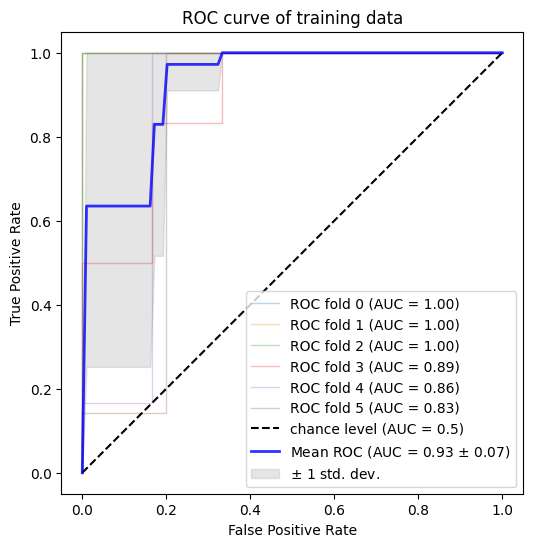

In [39]:
from sklearn.metrics import RocCurveDisplay
model = model_PA
label="ROC curve of training data"
roc(X_train,y_train,model,label)

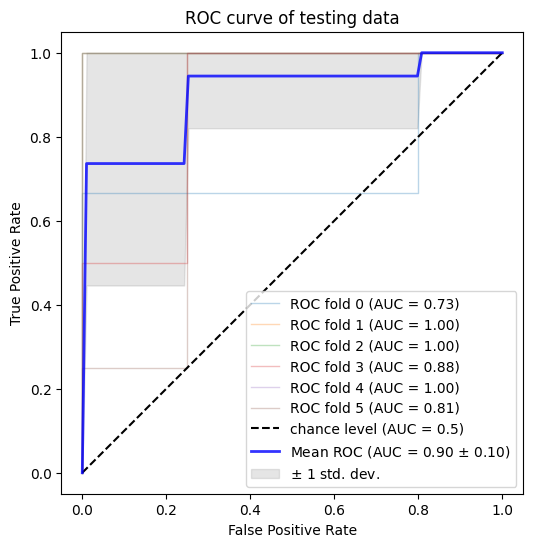

In [40]:
label="ROC curve of testing data"
roc(X_test,y_test,model,label)

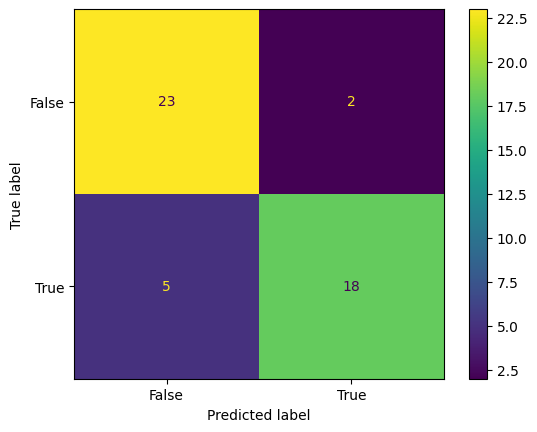

In [41]:
#######CONFUSION MATRIX ###########
from sklearn import metrics
y_test_pred_PA= model_PA.predict(X_test)
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred_PA)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()

In [42]:
total1=sum(sum(confusion_matrix_test))
#####from confusion matrix calculate accuracy
accuracy1=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.8541666666666666
Sensitivity :  0.92
Specificity :  0.782608695652174


In [43]:
# for important features:
important_feat = abs(model_PA.coef_[0])
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:30]

In [44]:
df1 = X.T

In [45]:
top_met = df1.iloc[idx]

In [46]:
top_met

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
mz_774_rt_551,325.0,184.0,383.0,59.0,106.0,79.0,153.0,671.0,227.0,236.0,...,154.458992,216.719687,114.181664,538.279777,460.306750,100.645787,401.057334,173.107453,672.027141,455.074687
mz_880_rt_1093,611.0,409.0,414.0,132.0,170.0,440.0,341.0,420.0,148.0,377.0,...,294.055020,379.548597,190.945061,587.804480,403.308641,348.529096,377.311462,371.413128,433.982102,419.267917
mz_721_rt_551,61.0,58.0,297.0,7.0,116.0,15.0,57.0,588.0,196.0,66.0,...,21.020375,118.599698,99.963938,302.243947,318.382718,19.189507,282.590141,59.145147,547.645963,359.736106
mz_1198_rt_1636,582.0,420.0,480.0,423.0,161.0,418.0,380.0,433.0,65.0,425.0,...,50.513497,391.771292,142.345805,536.244927,473.420702,378.199683,462.245896,387.870884,549.905890,497.479908
mz_1251_rt_1364,521.0,360.0,376.0,343.0,26.0,382.0,300.0,369.0,134.0,346.0,...,79.304892,353.657064,34.999831,658.922606,323.365617,341.501432,367.737737,336.078856,409.363281,384.620228
mz_668_rt_551,13.0,4.0,71.0,4.0,35.0,5.0,3.0,235.0,124.0,0.0,...,3.986245,15.142785,29.763735,58.906087,124.456795,2.206995,76.081933,0.000000,190.861088,100.931348
mz_880_rt_1636,451.0,300.0,256.0,80.0,83.0,256.0,197.0,181.0,85.0,165.0,...,187.671423,157.171342,100.672395,404.769631,222.281098,243.431479,203.852453,144.066291,278.636837,262.225720
mz_880_rt_1364,517.0,283.0,293.0,195.0,154.0,345.0,337.0,305.0,153.0,336.0,...,214.089151,307.874248,164.145264,428.664102,311.093069,293.329413,322.663939,291.709705,311.569515,297.549565
mz_721_rt_280,44.0,48.0,271.0,3.0,112.0,6.0,53.0,480.0,136.0,62.0,...,21.866274,115.365479,96.782104,209.231350,306.363726,6.000000,254.778655,61.163995,490.152660,325.834230
mz_1410_rt_2720,226.0,86.0,99.0,177.0,18.0,241.0,171.0,224.0,81.0,237.0,...,56.767194,175.468688,24.545331,489.445349,171.372276,199.803180,139.622924,218.192591,143.390068,108.817482
